<a href="https://colab.research.google.com/github/supatsara2002/bsc_dpdm22/blob/main/%5Bdataprep3%5D_Discretization_Normalization_One_hot_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Normalization-Standardization
https://scikit-learn.org/stable/modules/preprocessing.html

In [54]:
import pandas as pd
import json

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## ใช้ data กรมอุตุ

In [56]:
weather_data = pd.read_csv('/content/drive/MyDrive/bsc_DPDM_data/group_quiz.csv')

In [57]:
weather_data.shape

(8169, 13)

In [58]:
weather_data.head()

,จังหวัด,วัน,เดือน,ปี,ความกด,ความชื้น,อุณหภูมิตุ้มแห้ง,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตำ่สุด,จำนวนเมฆ,ปริมาณฝน,ความเร็วลม,date
0,ขอนแก่น,1,10,2011,1005.47,83,27.6,24.2,24.8,9,1.4,3,2011-10-01
1,ขอนแก่น,2,10,2011,1006.65,92,25.6,24.0,23.0,10,17.7,2,2011-10-02
2,ขอนแก่น,3,10,2011,1007.49,86,25.6,22.9,22.1,10,3,3,2011-10-03
3,ขอนแก่น,4,10,2011,1008.28,80,25.8,21.9,22.8,8,0,2,2011-10-04
4,ขอนแก่น,5,10,2011,1009.88,86,24.3,21.7,23.1,10,2.2,2,2011-10-05


In [59]:
data_features = weather_data.iloc[:,4:-1]
data_features

,ความกด,ความชื้น,อุณหภูมิตุ้มแห้ง,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตำ่สุด,จำนวนเมฆ,ปริมาณฝน,ความเร็วลม
0,1005.47,83,27.6,24.2,24.8,9,1.4,3
1,1006.65,92,25.6,24.0,23.0,10,17.7,2
2,1007.49,86,25.6,22.9,22.1,10,3,3
3,1008.28,80,25.8,21.9,22.8,8,0,2
4,1009.88,86,24.3,21.7,23.1,10,2.2,2
...,...,...,...,...,...,...,...,...
8164,1008.39,69,26.8,18.4,18.0,0,0,1
8165,1006.05,61,27.8,17.3,19.5,0,0,1
8166,1004.86,55,26.3,13.0,16.0,0,0,2
8167,1005.76,56,25.2,13.8,15.3,2,0,1


In [60]:
data_features.describe()

,ความกด,ความชื้น,อุณหภูมิตุ้มแห้ง,อุณหภูมิจุดน้ำค้าง
count,8169.000000,8169.000000,8169.000000,8169.000000
mean,1013.016946,69.798262,24.868405,18.151916
std,3.224640,8.870501,2.846185,3.775475
min,1002.040000,38.000000,11.800000,1.500000
25%,1010.960000,64.000000,23.300000,15.800000
50%,1012.800000,69.000000,25.300000,18.400000
75%,1015.010000,75.000000,27.000000,21.000000
max,1026.100000,99.000000,31.000000,28.400000


In [79]:
data_features.dtypes

ความกด                float64
ความชื้น                int64
อุณหภูมิตุ้มแห้ง      float64
อุณหภูมิจุดน้ำค้าง    float64
อุณหภูมิตำ่สุด         object
จำนวนเมฆ               object
ปริมาณฝน               object
ความเร็วลม             object
dtype: object

In [81]:
data_features['ความเร็วลม'] = data_features['ความเร็วลม'].astype(int)

ValueError: ignored

In [82]:
data_features_d = data_features[data_features.eq('-').any(1)==False] #.any(1) ดูทุกcolumns
#weather_data[weather_data.eq('-').any(1)==False] ตามหาค่าที่ต้องการแล้วลบ

In [83]:
data_features_d[data_features_d['ความเร็วลม'].eq('-')].head() #หาแค่ต้องกาi

,ความกด,ความชื้น,อุณหภูมิตุ้มแห้ง,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตำ่สุด,จำนวนเมฆ,ปริมาณฝน,ความเร็วลม


In [84]:
data_features_d = data_features_d[data_features_d.eq('T').any(1)==False]

In [86]:
data_features_d

,ความกด,ความชื้น,อุณหภูมิตุ้มแห้ง,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตำ่สุด,จำนวนเมฆ,ปริมาณฝน,ความเร็วลม
0,1005.47,83,27.6,24.2,24.8,9,1.4,3
1,1006.65,92,25.6,24.0,23.0,10,17.7,2
2,1007.49,86,25.6,22.9,22.1,10,3,3
3,1008.28,80,25.8,21.9,22.8,8,0,2
4,1009.88,86,24.3,21.7,23.1,10,2.2,2
...,...,...,...,...,...,...,...,...
8164,1008.39,69,26.8,18.4,18.0,0,0,1
8165,1006.05,61,27.8,17.3,19.5,0,0,1
8166,1004.86,55,26.3,13.0,16.0,0,0,2
8167,1005.76,56,25.2,13.8,15.3,2,0,1


##แปลงให้เป็นตัวเลข

In [87]:
data_features_d['ความเร็วลม'] = data_features_d['ความเร็วลม'].astype(float)
data_features_d['อุณหภูมิตำ่สุด'] = data_features_d['อุณหภูมิตำ่สุด'].astype(float)
data_features_d['จำนวนเมฆ'] = data_features_d['จำนวนเมฆ'].astype(float)
data_features_d['ปริมาณฝน'] = data_features_d['ปริมาณฝน'].astype(float)

In [89]:
data_features_d.dtypes

ความกด                float64
ความชื้น                int64
อุณหภูมิตุ้มแห้ง      float64
อุณหภูมิจุดน้ำค้าง    float64
อุณหภูมิตำ่สุด        float64
จำนวนเมฆ              float64
ปริมาณฝน              float64
ความเร็วลม            float64
dtype: object

In [90]:
data_features_d.describe()

,ความกด,ความชื้น,อุณหภูมิตุ้มแห้ง,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตำ่สุด,จำนวนเมฆ,ปริมาณฝน,ความเร็วลม
count,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000
mean,1012.731324,70.438253,25.002667,18.420944,19.933570,3.308832,1.556194,2.284726
std,3.158633,9.433792,2.720534,3.630472,3.295887,2.494353,6.816712,1.209540
min,1002.040000,38.000000,11.800000,1.500000,6.800000,0.000000,0.000000,0.000000
25%,1010.760000,64.000000,23.500000,16.100000,17.900000,1.000000,0.000000,1.000000
50%,1012.610000,69.000000,25.400000,18.500000,20.300000,3.000000,0.000000,2.000000
75%,1014.710000,77.000000,26.900000,21.200000,22.500000,5.000000,0.000000,3.000000
max,1026.100000,99.000000,31.000000,28.400000,26.700000,10.000000,112.400000,10.000000


In [135]:
import matplotlib
matplotlib.rcParams['figure.figsize']=[10,6]

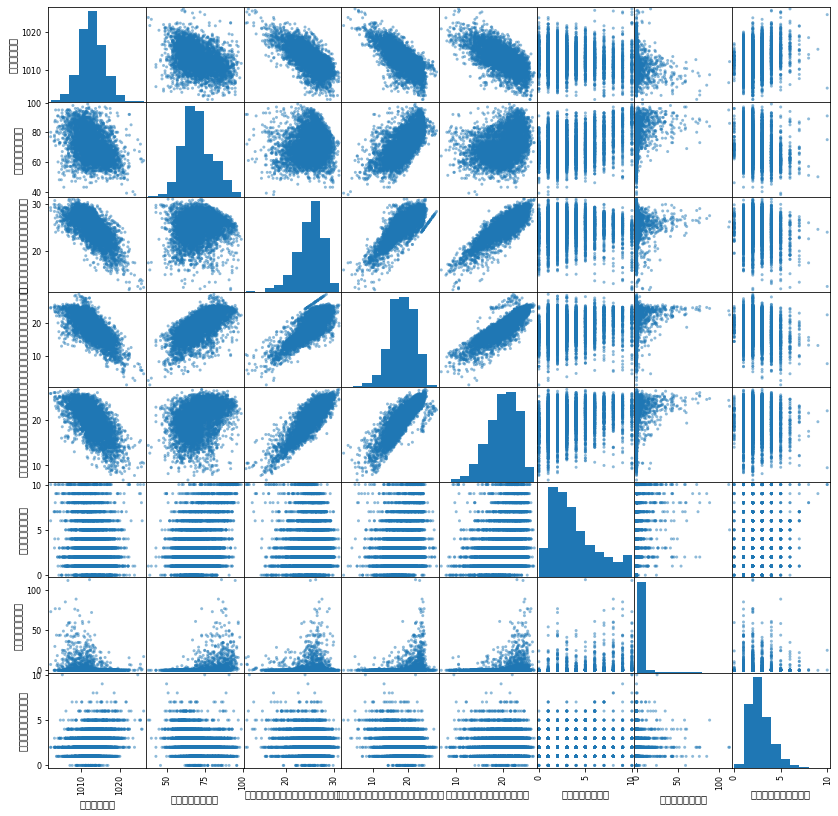

In [99]:
pd.plotting.scatter_matrix(data_features_d);

In [100]:
from matplotlib import pyplot as plt

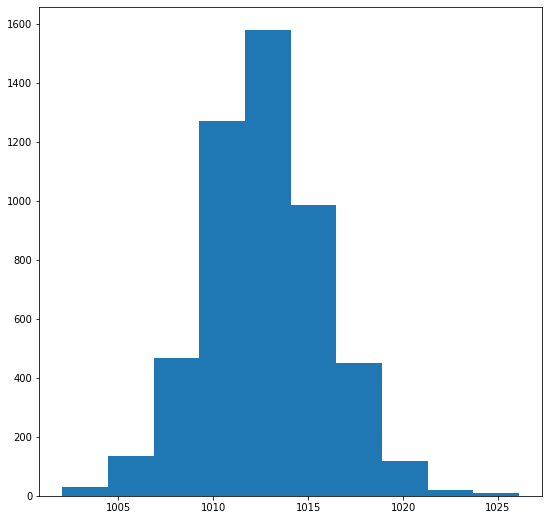

In [107]:
plt.hist(data_features_d['ความกด']);

In [108]:
from sklearn import preprocessing

In [153]:
#define ตั้งค่า
scaler = preprocessing.StandardScaler() #code(ใส่ค่าได้)
#train สร้างโมเดล
scaler.fit(data_features_d)
#predict-transform ใช้งาน
data_features_d_s = scaler.transform(data_features_d)

#scaler = preprocessing.StandardScaler().fit_transform(data_features_d) codeรวม

In [116]:
data_features_d_s

array([[-2.29910857,  1.33170074,  0.95480871, ...,  2.28184617,
        -0.02291572,  0.5914187 ],
       [-1.92549238,  2.28581221,  0.21958617, ...,  2.68279133,
         2.36850273, -0.23542385],
       [-1.65952832,  1.64973789,  0.21958617, ...,  2.68279133,
         0.21182474,  0.5914187 ],
       ...,
       [-2.49224914, -1.63664607,  0.47691406, ..., -1.32666027,
        -0.22831362, -0.23542385],
       [-2.20728764, -1.53063368,  0.07254167, ..., -0.52476995,
        -0.22831362, -1.06226641],
       [-1.43155912, -1.31860891,  0.21958617, ..., -0.92571511,
        -0.22831362, -1.06226641]])

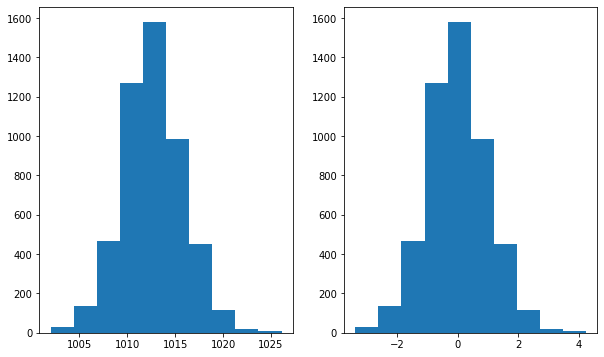

In [149]:
plt.subplot(1,2,1)
plt.hist(data_features_d['ความกด'])
plt.subplot(1,2,2)
plt.hist(data_features_d_s[:,0]);

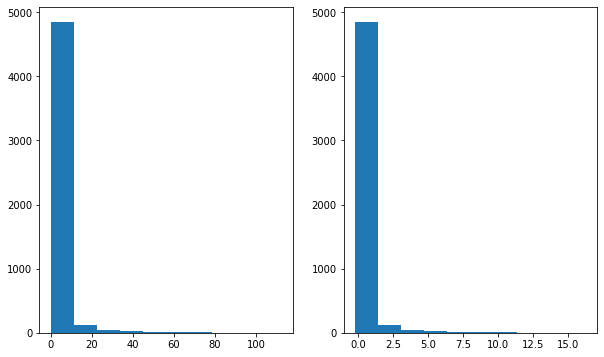

In [150]:
plt.subplot(1,2,1)
plt.hist(data_features_d['ปริมาณฝน'])
plt.subplot(1,2,2)
plt.hist(data_features_d_s[:,6]);

In [154]:
#define ตั้งค่า
min_max_scaler = preprocessing.MinMaxScaler() #code(ใส่ค่าได้)
#train สร้างโมเดล
min_max_scaler.fit(data_features_d)
#predict-transform ใช้งาน
data_features_d_norm =min_max_scaler.transform(data_features_d)

#min_max_scaler = preprocessing.MinMaxScaler().fit_transform(data_features_d)

In [156]:
data_features_d_norm

array([[0.14256027, 0.73770492, 0.82291667, ..., 0.9       , 0.01245552,
        0.3       ],
       [0.19160432, 0.8852459 , 0.71875   , ..., 1.        , 0.15747331,
        0.2       ],
       [0.22651704, 0.78688525, 0.71875   , ..., 1.        , 0.02669039,
        0.3       ],
       ...,
       [0.11720698, 0.27868852, 0.75520833, ..., 0.        , 0.        ,
        0.2       ],
       [0.15461347, 0.29508197, 0.69791667, ..., 0.2       , 0.        ,
        0.1       ],
       [0.25644223, 0.32786885, 0.71875   , ..., 0.1       , 0.        ,
        0.1       ]])

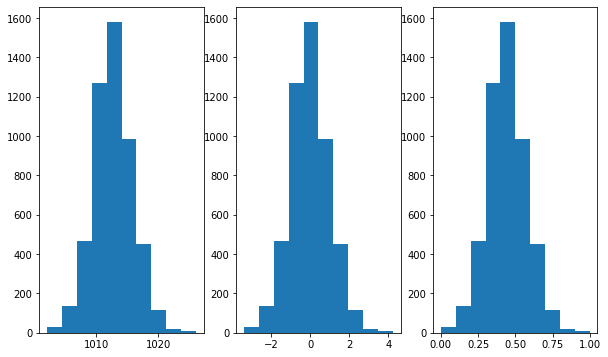

In [159]:
plt.subplot(1,3,1)
plt.hist(data_features_d['ความกด'])
plt.subplot(1,3,2)
plt.hist(data_features_d_s[:,0])
plt.subplot(1,3,3)
plt.hist(data_features_d_norm[:,0]);

#Discretization 

In [200]:
home_data = pd.read_csv('/content/drive/MyDrive/bsc_DPDM_data/ศุภัสรา_คุริรัง.csv')

In [201]:
home_data.head()

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,district,zone,street,sell_price,d250-7/11,d500-7/11,d750-7/11,d1000-7/11,d1250-7/11,d1500-7/11
0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,135.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,NaN,2700000.0,0,1,1,1,1,2
1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,112.0,...,เมืองขอนแก่น,กลางเมือง-เมืองเก่า-กุดกว้าง,NaN,2600000.0,0,1,2,3,5,5
2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,โพธิสาร,5900000.0,0,0,0,2,2,3
3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,NaN,4400000.0,0,0,2,4,8,12
4,566.0,NaN,NaN,65.0,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,ศรีจันทร์,2750000.0,0,1,2,3,4,4


In [202]:
home_data.shape

(100, 22)

## ลบ record ที่มีค่า sell price เป็นค่าว่่าง

In [203]:
home_data = home_data.dropna(subset=['sell_price'])

In [204]:
home_data

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,district,zone,street,sell_price,d250-7/11,d500-7/11,d750-7/11,d1000-7/11,d1250-7/11,d1500-7/11
0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,135.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,NaN,2700000.0,0,1,1,1,1,2
1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,112.0,...,เมืองขอนแก่น,กลางเมือง-เมืองเก่า-กุดกว้าง,NaN,2600000.0,0,1,2,3,5,5
2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,โพธิสาร,5900000.0,0,0,0,2,2,3
3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,NaN,4400000.0,0,0,2,4,8,12
4,566.0,NaN,NaN,65.0,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,ศรีจันทร์,2750000.0,0,1,2,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19495.0,0.0,1.0,76.2,2.0,0.0,0.0,0.0,0.0,193.0,...,เมืองขอนแก่น,สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,NaN,5500000.0,0,2,3,7,10,14
96,19496.0,0.0,2.0,56.8,1.0,0.0,0.0,0.0,0.0,0.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,NaN,7911000.0,0,0,0,1,4,9
97,20164.0,0.0,1.0,2.0,1.0,4.0,2.0,0.0,0.0,0.0,...,เมืองขอนแก่น,สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,NaN,2990000.0,1,1,2,4,7,9
98,31.0,0.0,0.0,55.8,2.0,3.0,2.0,0.0,0.0,188.0,...,เมืองขอนแก่น,โนนม่วง-มข.-เลี่ยงเมือง-โนนเรือง,ถนนมิตรภาพ(ทล.2) กม.6+150,4000000.0,0,0,1,3,3,4


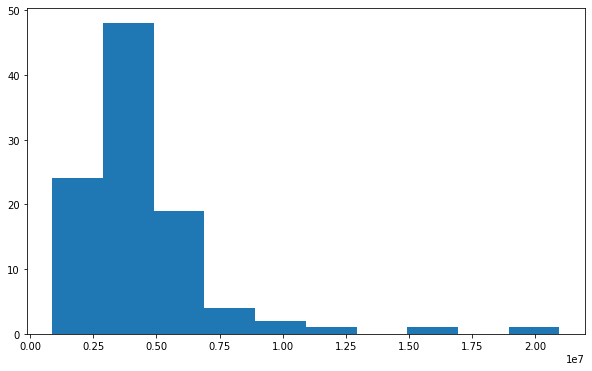

In [205]:
plt.hist(home_data['sell_price']);

### แปลงค่า sell_price 
- ราคาที่ตำ่กว่า 500k ให้เป็น 1
- ราคาระหว่าง 500k-1m ให้เป็น 2
- ราคา 1m ขึ้นไป ให้เป็น 3

In [255]:
import pandas as pd, numpy as np
bins = [0,5000000,10000000]
names = ['1','2','3']
d = dict(enumerate(names,1))
home_data['price_class'] = np.vectorize(d.get)(np.digitize(home_data['sell_price'], bins))
home_data.head()

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,zone,street,sell_price,d250-7/11,d500-7/11,d750-7/11,d1000-7/11,d1250-7/11,d1500-7/11,price_class
0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,135.0,...,โนนทัน-บึงแก่นนคร,NaN,2700000.0,0,1,1,1,1,2,1
1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,112.0,...,กลางเมือง-เมืองเก่า-กุดกว้าง,NaN,2600000.0,0,1,2,3,5,5,1
2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,0.0,...,โนนทัน-บึงแก่นนคร,โพธิสาร,5900000.0,0,0,0,2,2,3,2
3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,0.0,...,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,NaN,4400000.0,0,0,2,4,8,12,1
4,566.0,NaN,NaN,65.0,NaN,0.0,NaN,0.0,0.0,0.0,...,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,ศรีจันทร์,2750000.0,0,1,2,3,4,4,1


# One-hot-encoder

In [258]:
home_data_dummies = pd.get_dummies(home_data,columns=['zone'])

In [259]:
home_data_dummies

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,zone_ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,zone_บ้านเป็ด-โคกฟันโปง,zone_ม.ภาค-บ้านกอก-บึงหนองโคตร,zone_มะลิวัลย์-ร.8-สนามบิน,zone_ศิลา-โกทา-หนองไผ่-บ้านดอน,zone_สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,zone_เหล่านาดี-บ้านสะอาด-บ้านโจด,zone_โนนทัน-บึงแก่นนคร,zone_โนนม่วง-มข.-เลี่ยงเมือง-โนนเรือง,zone_ในเมือง-รื่นรมย์-เทพารักษ์
0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,135.0,...,0,0,0,0,0,0,0,1,0,0
1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,112.0,...,0,0,0,0,0,0,0,0,0,0
2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,566.0,NaN,NaN,65.0,NaN,0.0,NaN,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19495.0,0.0,1.0,76.2,2.0,0.0,0.0,0.0,0.0,193.0,...,0,0,0,0,0,1,0,0,0,0
96,19496.0,0.0,2.0,56.8,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
97,20164.0,0.0,1.0,2.0,1.0,4.0,2.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
98,31.0,0.0,0.0,55.8,2.0,3.0,2.0,0.0,0.0,188.0,...,0,0,0,0,0,0,0,0,1,0
